Librerías proyecto

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn import metrics
from sklearn import linear_model
from sklearn import model_selection
from sklearn.model_selection import train_test_split #para dividir los datos
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import seaborn as sea 
%matplotlib inline 

In [7]:
import warnings
warnings.filterwarnings('ignore')
import os
import tensorflow as tf
from tensorflow import keras

from sklearn import preprocessing


importación del dataset

In [8]:
dataset=pd.read_csv('weatherHistory_def.csv')
dataset.columns

Index(['Tipo de precipitacion', 'Temperatura (C)', 'Temperatura aparente (C)',
       'Humedad', 'Velocidad viento (km/h)', 'Direccion del viento (grados)',
       'Visibilidad (km)', 'Presion (millibares)'],
      dtype='object')

In [ ]:
dataset.head()

,Tipo de precipitacion,Temperatura (C),Temperatura aparente (C),Humedad,Velocidad viento (km/h),Direccion del viento (grados),Visibilidad (km),Presion (millibares)
0,1,9.472,7.389,0.89,14.120,0.699164,15.826,0.970135
1,1,9.356,7.228,0.86,14.265,0.721448,15.826,0.970613
2,1,9.378,9.378,0.89,3.928,0.568245,14.957,0.970909
3,1,8.289,5.944,0.83,14.104,0.749304,15.826,0.971358
4,1,8.756,6.978,0.83,11.045,0.721448,15.826,0.971454


columnas del dataset

In [ ]:
dataset.columns

Index(['Tipo de precipitacion', 'Temperatura (C)', 'Temperatura aparente (C)',
       'Humedad', 'Velocidad viento (km/h)', 'Direccion del viento (grados)',
       'Visibilidad (km)', 'Presion (millibares)'],
      dtype='object')

largo del dataset

In [ ]:
dataset.shape

(20000, 8)

In [ ]:
dataset.describe()

,Tipo de precipitacion,Temperatura (C),Temperatura aparente (C),Humedad,Velocidad viento (km/h),Direccion del viento (grados),Visibilidad (km),Presion (millibares)
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,0.881700,11.626789,10.527893,0.723865,10.661408,0.536370,10.122489,0.954458
std,0.322971,9.578757,10.658440,0.192176,6.858858,0.294796,3.754275,0.132177
min,0.000000,-14.089000,-22.094000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,4.165500,1.944000,0.600000,5.474000,0.339833,9.676000,0.967192
50%,1.000000,11.183000,11.183000,0.770000,9.692000,0.532033,9.982000,0.971788
75%,1.000000,18.651500,18.651500,0.880000,14.104000,0.807799,11.399000,0.977102
max,1.000000,39.906000,38.378000,1.000000,63.853000,1.000000,16.100000,1.000000


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Tipo de precipitacion          20000 non-null  int64  
 1   Temperatura (C)                20000 non-null  float64
 2   Temperatura aparente (C)       20000 non-null  float64
 3   Humedad                        20000 non-null  float64
 4   Velocidad viento (km/h)        20000 non-null  float64
 5   Direccion del viento (grados)  20000 non-null  int64  
 6   Visibilidad (km)               20000 non-null  float64
 7   Presion (millibares)           20000 non-null  float64
dtypes: float64(6), int64(2)
memory usage: 1.2 MB


Verificando si existen datos nulos


In [ ]:
dataset.isnull().any()

Tipo de precipitacion            False
Temperatura (C)                  False
Temperatura aparente (C)         False
Humedad                          False
Velocidad viento (km/h)          False
Direccion del viento (grados)    False
Visibilidad (km)                 False
Presion (millibares)             False
dtype: bool

In [ ]:
dataset['Tipo de precipitacion'].value_counts()

1    17634
0     2366
Name: Tipo de precipitacion, dtype: int64

Separar columnas de entrada y salida. La salida: precip type

In [9]:
Columnas_De_Entradas= ['Temperatura (C)', 'Temperatura aparente (C)',
       'Humedad', 'Velocidad viento (km/h)', 'Direccion del viento (grados)',
       'Visibilidad (km)', 'Presion (millibares)']
x=dataset[Columnas_De_Entradas]
y=dataset['Tipo de precipitacion'].astype('int')

Configurar los datos para la regresion

In [10]:
X_Entrenamiento, X_Prueba, y_Entrenamiento, y_Prueba= train_test_split(x,y, test_size=0.2, random_state=4)

Datos preliminares de X_entrenamiento

In [ ]:
X_Entrenamiento.head()

,Temperatura (C),Temperatura aparente (C),Humedad,Velocidad viento (km/h),Direccion del viento (grados),Visibilidad (km),Presion (millibares)
2236,-2.761,-2.761,0.96,2.834,0.612813,0.322,0.965835
17263,7.356,7.356,0.80,0.660,1.000000,6.118,0.968023
10577,-3.889,-3.889,0.85,0.000,0.000000,3.043,0.992058
4028,23.222,23.222,0.77,1.674,0.966574,10.352,0.971913
14252,7.228,3.261,0.87,26.533,0.331476,3.751,0.948938


In [11]:
print(X_Entrenamiento)
print(X_Prueba)
print(y_Entrenamiento)
print(y_Prueba)

       Temperatura (C)  ...  Presion (millibares)
2236            -2.761  ...              0.965835
17263            7.356  ...              0.968023
10577           -3.889  ...              0.992058
4028            23.222  ...              0.971913
14252            7.228  ...              0.948938
...                ...  ...                   ...
16840           24.817  ...              0.969705
11863            1.283  ...              0.981498
17093           11.739  ...              0.973518
8366            20.861  ...              0.970881
17530           17.778  ...              0.967373

[16000 rows x 7 columns]
       Temperatura (C)  ...  Presion (millibares)
1919            -5.844  ...              0.993626
6624             3.656  ...              0.974627
3858            27.778  ...              0.975907
5053            13.217  ...              0.979568
8745            19.928  ...              0.970106
...                ...  ...                   ...
3469            -2.050  

Entrenando con los datos. Calculando el porcentaje de ajuste R cuadrado

In [12]:
RL = LogisticRegression(C=0.01, solver='liblinear').fit(X_Entrenamiento, y_Entrenamiento)
#RegresionLogistica= linear_model.LogisticRegression()
#Regresionlogistica.fit(X_Entrenamiento, y_Entrenamiento)
y_Predecido=RL.predict(X_Prueba)
#Porcentaje de ajuste
ajuste = RL.score(X_Prueba,y_Prueba)
print('\nEl porcentaje de ajuste es: ', ajuste*100, '%\n')


El porcentaje de ajuste es:  99.0 %



In [21]:
X_Prueba

,Temperatura (C),Temperatura aparente (C),Humedad,Velocidad viento (km/h),Direccion del viento (grados),Visibilidad (km),Presion (millibares)
1919,-5.844,-5.844,0.92,3.220,0.194986,8.050,0.993626
6624,3.656,0.928,0.83,10.642,0.576602,14.168,0.974627
3858,27.778,26.989,0.31,7.503,0.991643,9.982,0.975907
5053,13.217,13.217,0.87,16.052,0.002786,11.270,0.979568
8745,19.928,19.928,0.69,12.333,0.476323,10.046,0.970106
...,...,...,...,...,...,...,...
3469,-2.050,-6.950,0.88,15.134,0.941504,3.268,0.977962
12015,7.778,5.589,0.68,12.268,0.214485,10.046,0.974340
10981,5.156,3.522,0.93,7.309,0.381616,1.352,0.961458
18582,17.011,17.011,0.73,11.077,0.919220,9.982,0.972983


In [23]:
X_Entrenamiento.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16000 entries, 2236 to 17530
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperatura (C)                16000 non-null  float64
 1   Temperatura aparente (C)       16000 non-null  float64
 2   Humedad                        16000 non-null  float64
 3   Velocidad viento (km/h)        16000 non-null  float64
 4   Direccion del viento (grados)  16000 non-null  float64
 5   Visibilidad (km)               16000 non-null  float64
 6   Presion (millibares)           16000 non-null  float64
dtypes: float64(7)
memory usage: 1000.0 KB


In [27]:
X_user=pd.DataFrame([	9.472,7.389,0.89,14.120,0.699165,15.826,0.970135])

y_Predecido=RL.predict(X_user)


ValueError: ignored

*Prueba* del primer modelo- Regresión Lineal

In [ ]:
pd.DataFrame({'actual': y_Prueba,
              'prediccion':y_Predecido, 
              'diferencia': y_Prueba-y_Predecido})

,actual,prediccion,diferencia
1919,0,0,0
6624,1,1,0
3858,1,1,0
5053,1,1,0
8745,1,1,0
...,...,...,...
3469,0,0,0
12015,1,1,0
10981,1,1,0
18582,1,1,0


Gráfico de los resultados. Las variables están mal hay que ajustar.Fuente en inglés: https://bansal-pranav.medium.com/temperature-prediction-using-machine-learning-and-comparison-between-different-regression-models-57a3ff52536b . Fuente 2:
https://www.statdeveloper.com/regresion-logistica-en-python/. Fuente 3: https://koldopina.com/regresion-lineal-simple/

<bound method Figure.show of <Figure size 900x600 with 1 Axes>>

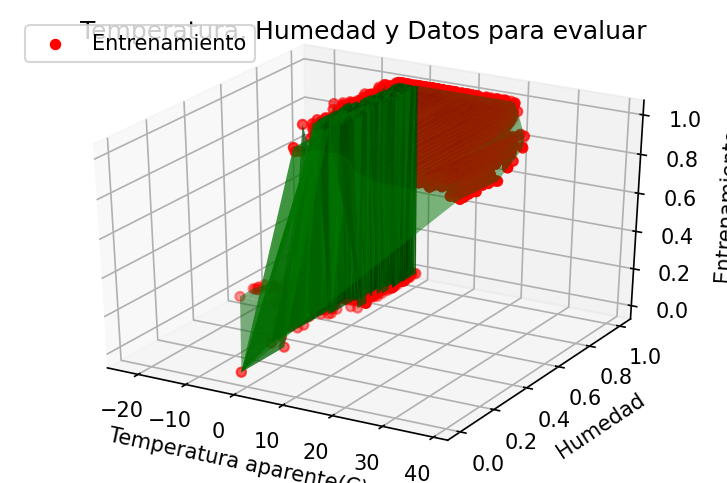

In [ ]:
#Columnas: 'Tipo de precipitacion', 'Temperatura (C)', 'Temperatura aparente (C)',
# 'Humedad', 'Velocidad viento (km/h)', 'Direccion del viento (grados)',
# 'Visibilidad (km)', 'Presion (millibares)']
#Grafico de los resultados de entrenamiento
fig = plt.figure(dpi=150)
Vista3d = fig.add_subplot(111, projection='3d')
Vista3d.scatter(X_Entrenamiento['Temperatura aparente (C)'], X_Entrenamiento['Humedad'], y_Entrenamiento, color = 'red', label = 'Entrenamiento')
Vista3d.plot_trisurf(X_Entrenamiento['Temperatura aparente (C)'],X_Entrenamiento['Humedad'], y_Entrenamiento,color = 'green', alpha = 0.5)
Vista3d.set_title('Temperatura, Humedad y Datos para evaluar')
Vista3d.set_xlabel('Temperatura aparente(C)')
Vista3d.set_ylabel('Humedad')
Vista3d.set_zlabel('Entrenamiento')
#Vista3d.set_yticks(range(len(paises)))
#Vista3d.set_yticklabels(paises)
plt.legend(loc="upper left") 
fig.show

<bound method Figure.show of <Figure size 900x600 with 1 Axes>>

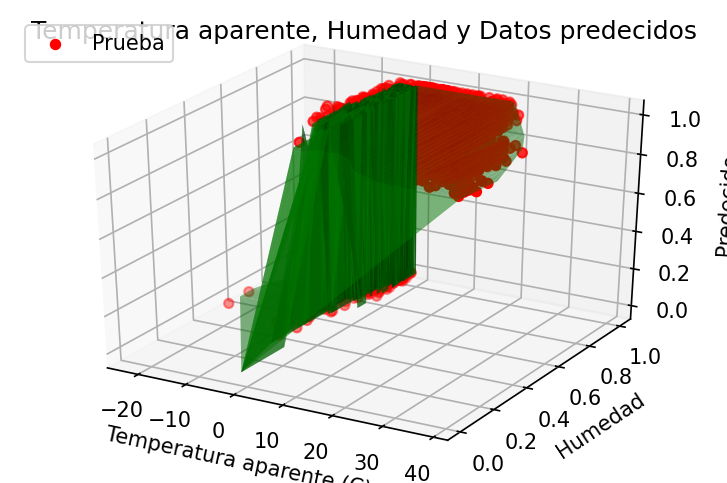

In [ ]:
fig = plt.figure(dpi=150)
Vista3d = fig.add_subplot(111, projection='3d')
Vista3d.scatter(X_Prueba['Temperatura aparente (C)'], X_Prueba['Humedad'], RL.predict(X_Prueba), color = 'red', label = 'Prueba')
Vista3d.plot_trisurf(X_Entrenamiento['Temperatura aparente (C)'],X_Entrenamiento['Humedad'], y_Entrenamiento,color = 'green', alpha = 0.5)
Vista3d.set_title('Temperatura aparente, Humedad y Datos predecidos')
Vista3d.set_xlabel('Temperatura aparente (C)')
Vista3d.set_ylabel('Humedad')
Vista3d.set_zlabel('Predecido')
#Vista3d.set_yticks(range(len(paises)))
#Vista3d.set_yticklabels(paises)
plt.legend(loc="upper left") 
fig.show

Calculando el error del modelo

In [ ]:
np.mean((y_Predecido-y_Prueba)**2)

0.01

MODELO DE REGRESION POLINÓMICA

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly=PolynomialFeatures(degree=4)
X_poly=poly.fit_transform(X_Entrenamiento)

poly.fit(X_poly, y_Entrenamiento)
lin2= LinearRegression()
lin2.fit(X_poly, y_Entrenamiento)

#Error de predicción
predicciondos=lin2.predict(poly.fit_transform(X_Prueba))
#Calculando el error
np.mean((predicciondos- y_Prueba)**2)

0.022054145902805595

In [ ]:
pd.DataFrame({'actual': y_Prueba,
             'predicción':predicciondos,
             'diff':(y_Prueba-predicciondos)})

,actual,predicción,diff
1919,0,-0.263511,0.263511
6624,1,0.895137,0.104863
3858,1,1.077672,-0.077672
5053,1,1.003855,-0.003855
8745,1,0.974713,0.025287
...,...,...,...
3469,0,0.173608,-0.173608
12015,1,1.085457,-0.085457
10981,1,0.969620,0.030380
18582,1,0.984018,0.015982


REGRESION DEL ARBOL DE DECISIÓN-CART

In [ ]:
from  sklearn.tree import DecisionTreeRegressor
RGSOR=DecisionTreeRegressor(random_state=0)
RGSOR.fit(X_Entrenamiento, y_Entrenamiento)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [ ]:
predicciontres=RGSOR.predict(X_Prueba)
np.mean((predicciontres-y_Prueba)**2)

0.0

In [ ]:
pd.DataFrame({'actual': y_Prueba,
              'prediccion': predicciontres,
              'diff':(y_Prueba-predicciontres)})

,actual,prediccion,diff
1919,0,0.0,0.0
6624,1,1.0,0.0
3858,1,1.0,0.0
5053,1,1.0,0.0
8745,1,1.0,0.0
...,...,...,...
3469,0,0.0,0.0
12015,1,1.0,0.0
10981,1,1.0,0.0
18582,1,1.0,0.0


#BOSQUE ALEATORIO CON UN DEPARTAMENTO MÁXIMO-10

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regr=RandomForestRegressor(max_depth=10, random_state=0, n_estimators=100)
regr.fit(X_Entrenamiento, y_Entrenamiento)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [ ]:
prediccioncuatro=regr.predict(X_Prueba)
np.mean((prediccioncuatro-y_Prueba)**2)

0.0

In [ ]:
pd.DataFrame({'actual': y_Prueba,
              'predicción': prediccioncuatro,
              'diff':(y_Prueba-prediccioncuatro)})

,actual,predicción,diff
1919,0,0.0,0.0
6624,1,1.0,0.0
3858,1,1.0,0.0
5053,1,1.0,0.0
8745,1,1.0,0.0
...,...,...,...
3469,0,0.0,0.0
12015,1,1.0,0.0
10981,1,1.0,0.0
18582,1,1.0,0.0


BOSQUE ALEATORIO CON PROFUNDIDAD MÁXIMA

In [ ]:
regr2=RandomForestRegressor(max_depth=50, random_state=0, n_estimators=100)
regr2.fit(X_Entrenamiento, y_Entrenamiento)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=50, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [ ]:
prediccioncinco=regr2.predict(X_Prueba)
np.mean((prediccioncinco-y_Prueba)**2)

0.0

In [ ]:
pd.DataFrame({'actual':y_Prueba,
              'prediccion': prediccioncinco,
              'diff':(y_Prueba-prediccioncinco)})

,actual,prediccion,diff
1919,0,0.0,0.0
6624,1,1.0,0.0
3858,1,1.0,0.0
5053,1,1.0,0.0
8745,1,1.0,0.0
...,...,...,...
3469,0,0.0,0.0
12015,1,1.0,0.0
10981,1,1.0,0.0
18582,1,1.0,0.0
